# DES-EDE Matter Power Spectrum

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from classy import Class

matplotlib.rcParams['axes.linewidth'] = 10
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 75
matplotlib.rcParams['xtick.labelsize'] = 65 
matplotlib.rcParams['ytick.labelsize'] = 65
matplotlib.rcParams['legend.fontsize'] = 65

In [2]:
#Planck 18 values, no lensing
omega_b_planck18 = 0.02236
tau_planck18     = 0.0544
n_s_planck18     = 0.9649
h_planck18       = 0.6727

#DES values
Omega_m_DES      = 0.267
S8_DES           = 0.773

#Dervied values
omega_cdm = Omega_m_DES*np.power(h_planck18,2) - omega_b_planck18
sigma8 = S8_DES*np.power(Omega_m_DES/0.3,-0.5)

LCDM_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                 'h':h_planck18,
                 'omega_b':omega_b_planck18,
                 'omega_cdm':omega_cdm,
                 'sigma8': sigma8,
                 'n_s':n_s_planck18,
                 'tau_reio':tau_planck18,
                 'm_ncdm': 0.06,
                 'N_ncdm':1, 
                 'N_ur':2.0328,
                 'l_max_scalars':3008,
                 'non linear':'halofit',
                 'P_k_max_h/Mpc':15,
                 'z_max_pk':1.}
LCDM = Class()
LCDM.set(LCDM_settings)
LCDM.compute()
hLCDM=LCDM.h()

In [3]:
omega_b_smith = 0.02253
tau_smith     = 0.085
n_s_smith     = 0.9686
h_smith       = 0.6821
A_s_smith        = 2.216e-9
omega_cdm_smith = 0.1177

LCDM_smith_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                 'h':h_smith,
                 'omega_b':omega_b_smith,
                 'omega_cdm':omega_cdm_smith,
                 'A_s': A_s_smith,
                 'n_s':n_s_smith,
                 'tau_reio':tau_smith,
                 'm_ncdm': 0.06,
                 'N_ncdm':1, 
                 'N_ur':2.0328,
                 'l_max_scalars':3008,
                 'non linear':'halofit',
                 'P_k_max_h/Mpc':15,
                 'z_max_pk':1.}
LCDM_smith = Class()
LCDM_smith.set(LCDM_smith_settings)
LCDM_smith.compute()
hLCDM_smith = LCDM_smith.h()

In [4]:
EDE = Class()

EDE.set({'fEDE': 0.122,
         'log10z_c': 3.562,
         'thetai_scf': 2.83,
         'h': .7219,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': 0.02253,
         'omega_cdm': 0.1306,
         'm_ncdm': 0.06, 
         'tau_reio': 0.072,
         'non linear':'halofit',
         'N_ncdm':1, 
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':2508,
         'P_k_max_h/Mpc':15,
         'z_max_pk':1.})

EDE.compute()

In [5]:
# Define array of k values in h/Mpc. 
hEDE = EDE.h()

kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc (by definition). k [Mpc^-1]=k/h[ h Mpc^-1]=kk [h Mpc^-1]
kMpcLCDM = kk*hLCDM # k in units of Mpc in LCDM
kMpcLCDM_smith = kk*hLCDM_smith
kMpcEDE = kk*hEDE # k in units of Mpc in EDE

In [6]:
# redshifts for DES
zDES = 0.525

In [7]:
#Store matter power spectrum.
pkzLCDM = np.zeros(len(kk)) #Pk in units of (h^-1 Mpc)^3
pkzLCDM_smith = np.zeros(len(kk)) #Pk in units of (h^-1 Mpc)^3
pkzEDE = np.zeros(len(kk)) #Pk in units of (h^-1 Mpc)^3
pkzDiff = np.zeros(len(kk)) #Difference of Pk's each in units of (h^-1 Mpc)^3
pkzDiff_smith = np.zeros(len(kk)) #Difference of Pk's each in units of (h^-1 Mpc)^3
pkzratio= np.zeros(len(kk)) #k in units of (h^-1 Mpc)^3
pkzratio_smith= np.zeros(len(kk)) #k in units of (h^-1 Mpc)^3


# Here we rescale k and pk to have units of h/Mpc and (Mpc/h)^3 respectively. Note tha
for kindex in range(len(kk)):
    for zindex in range(1):
        pkzLCDM[kindex] = LCDM.h()**3*LCDM.pk(kMpcLCDM[kindex],zDES)
        pkzLCDM_smith[kindex] = LCDM_smith.h()**3*LCDM_smith.pk(kMpcLCDM_smith[kindex],zDES)
        pkzEDE[kindex] = EDE.h()**3*EDE.pk(kMpcEDE[kindex],zDES)
        pkzDiff[kindex] = (pkzEDE[kindex]*pkzLCDM[kindex]) - 1.
        pkzDiff_smith[kindex] = (pkzEDE[kindex]*pkzLCDM_smith[kindex]) - 1.
        pkzratio[kindex] = pkzEDE[kindex]/pkzLCDM[kindex]
        pkzratio_smith[kindex] = pkzEDE[kindex]/pkzLCDM_smith[kindex]

## Figure 8

Matter power spectra (left panel) and ratio of spectra (right panel) at the central redshift of DES observations, $z=0.525$, for $\Lambda$CDM with the DES-Y1 best-fit values $\Omega_m=0.267$ and $S_8=0.773$ (black, solid), the best-fit EDE model from Smith et al. The ratios in the right panel are computed with respect to DES-Y1 $\Lambda$CDM, thus giving an indication of how well the other two models' predictions match the DES-Y1 constraints. The blue shaded region is the approximate range of comoving wavenumbers probed by the angular scale cuts used in the DES-Y1 analysis.

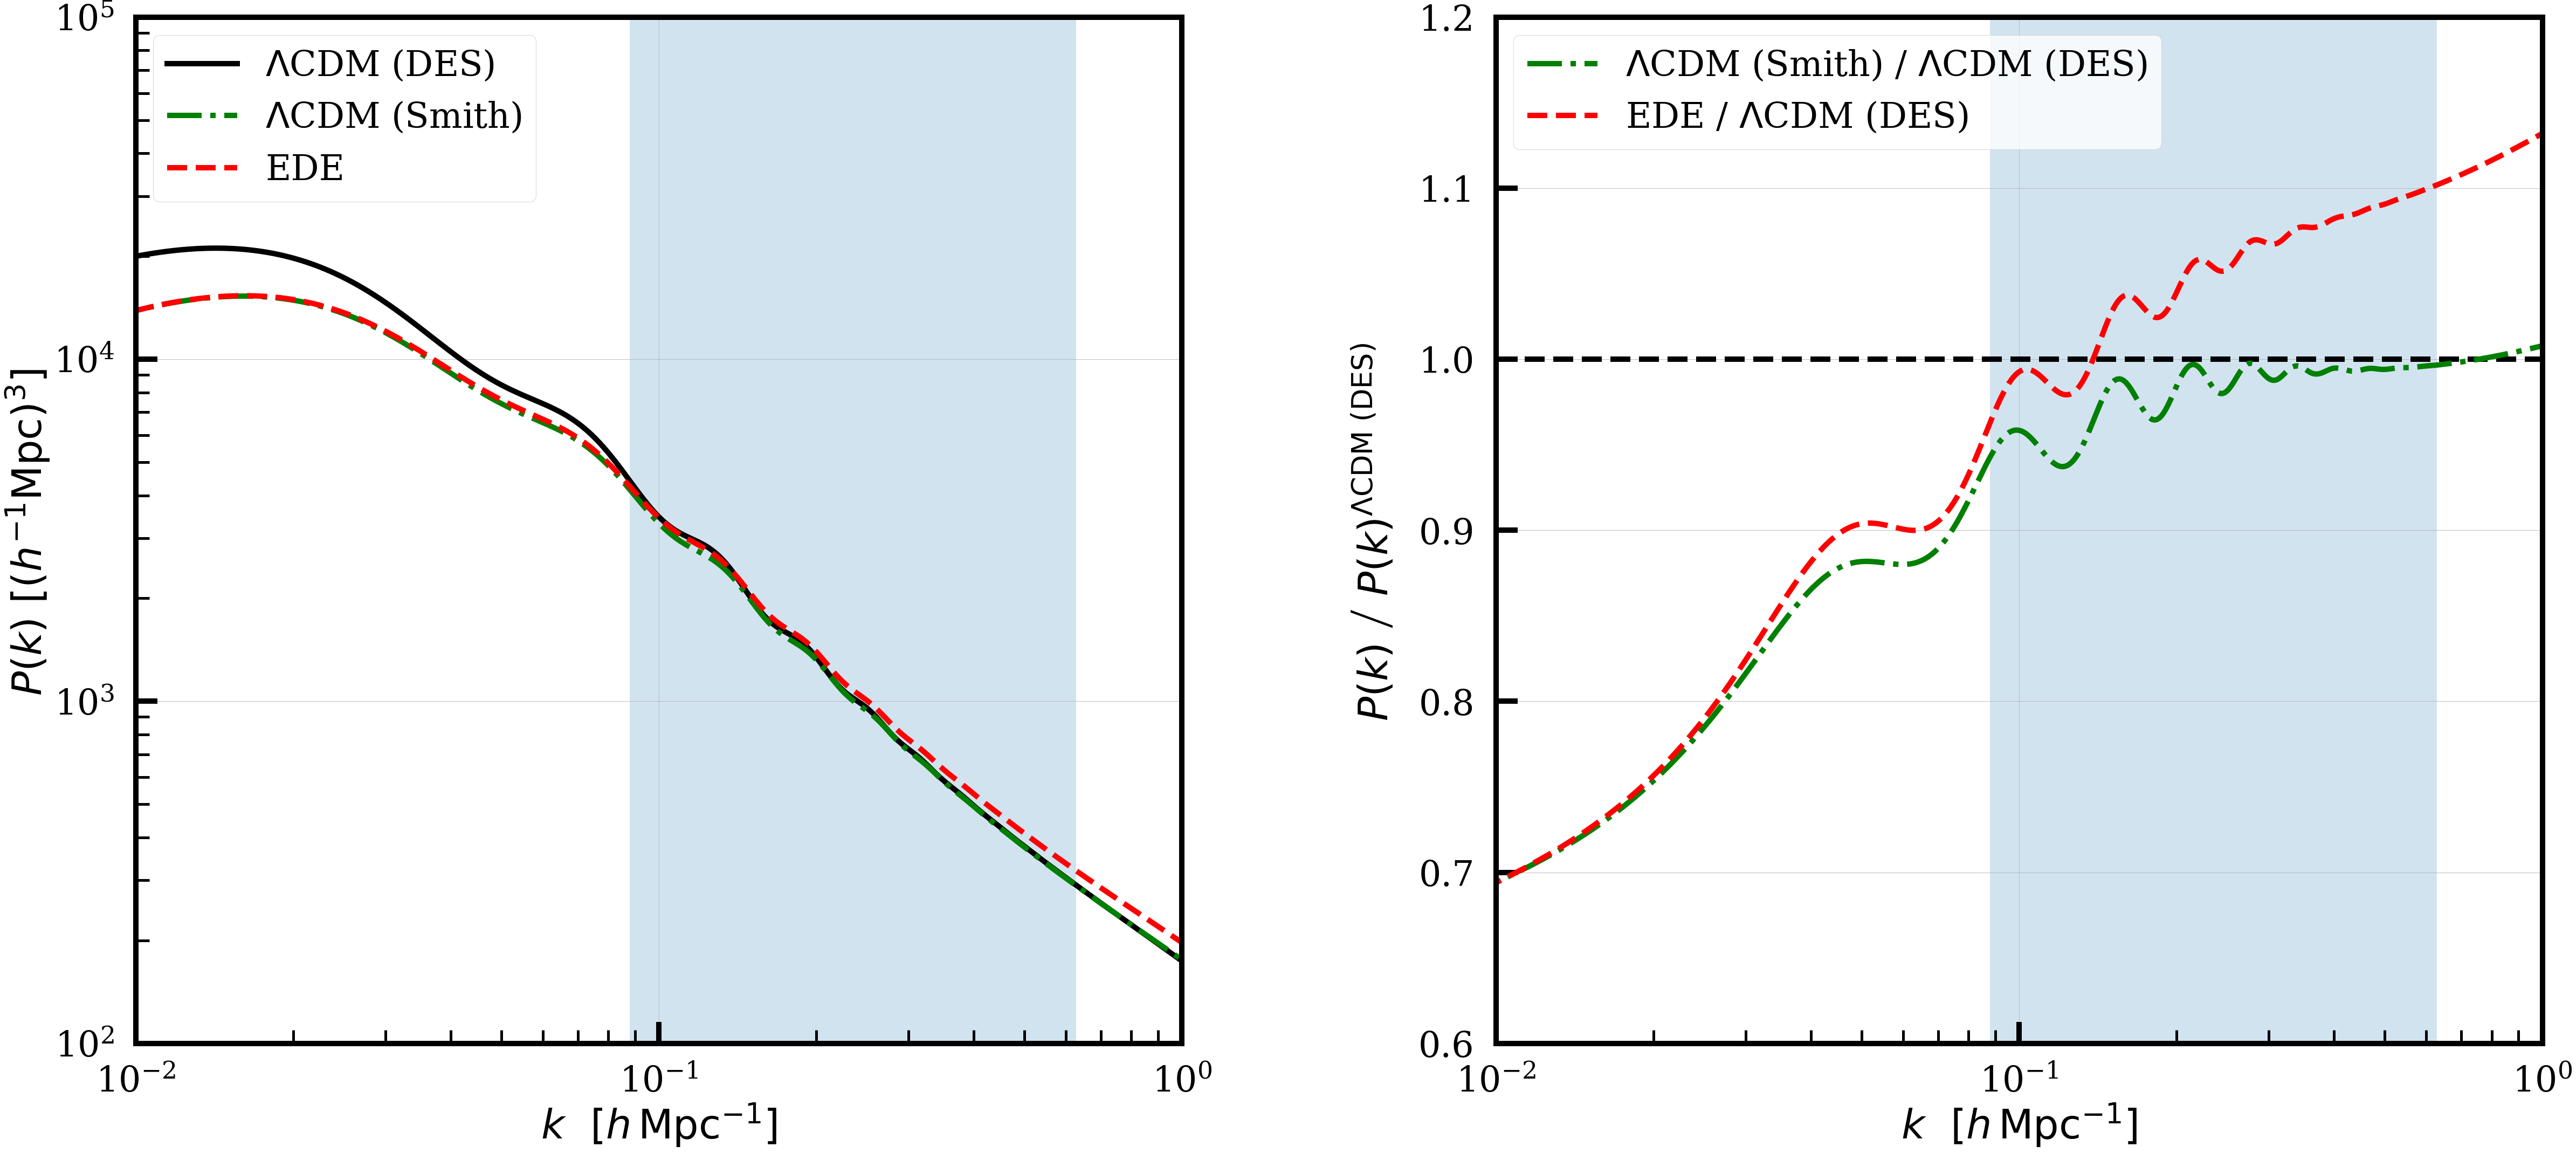

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(80,35))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.grid()
ax1.plot(kk,pkzLCDM,c='k',lw=10,label=r'$\Lambda$CDM (DES)')
ax1.plot(kk,pkzLCDM_smith,c='g',lw=10,ls='-.',label=r'$\Lambda$CDM (Smith)')
ax1.plot(kk,pkzEDE,c='r',lw=10,ls='--',label='EDE')
ax1.axvspan(0.088, .628,alpha=0.2) 
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim([1e-2,1])
ax1.set_ylim([1e2,1e5])
ax1.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax1.set_ylabel(r'$ P(k) ~ [ (h^{-1}{\rm Mpc})^3 ] $ ')
ax1.tick_params(pad=40)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax1.legend()
ax2.grid()
ax2.set_xlim([1e-2,1])
ax2.set_ylim([0.6,1.2])
ax2.axhline(1.0,c='k',lw=10,ls='--')
ax2.plot(kk,(pkzLCDM_smith)/pkzLCDM,ls='-.',c='g',lw=10,label=r'$\Lambda$CDM (Smith) / $\Lambda$CDM (DES)')
ax2.plot(kk,(pkzEDE)/pkzLCDM,c='r',ls='--',lw=10,label=r'EDE / $\Lambda$CDM (DES)')
ax2.axvspan(0.088, .628,alpha=0.2) 
ax2.set_xscale('log')
ax2.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax2.set_ylabel(r'$P(k) ~\left/~P(k)^{\Lambda {\rmCDM~(DES)}} \right.$ ',labelpad=40)
ax2.tick_params(pad=40)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax2.legend()
plt.savefig('../figures-for-paper/mPk/PkDES.pdf',bbox_inches='tight')